In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

forest_fire_df = pd.read_csv('FW_Veg_Rem_Combined.csv')
forest_fire_df

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55362,55362,55362,IMPACT,6289.0,G,Missing/Undefined,39.180000,-96.784167,KS,10/15/2015,...,3.804803,65.671410,61.839572,54.625698,55.042092,35.4,8.2,0.0,249.0,0.331501
55363,55363,55363,BUTTE,70868.0,G,Missing/Undefined,38.342719,-120.695967,CA,9/9/2015,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.124683
55364,55364,55364,WILLOW,5702.0,G,Arson,37.262607,-119.511139,CA,7/25/2015,...,2.529158,43.755556,43.755556,44.443975,35.924406,0.0,0.0,0.0,0.0,0.097682
55365,55365,55365,BARKER,3261.0,F,Miscellaneous,40.604300,-123.080450,CA,7/31/2015,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.178206


In [2]:
forest_fire_df.dtypes

Unnamed: 0            int64
Unnamed: 0.1          int64
fire_name            object
fire_size           float64
fire_size_class      object
stat_cause_descr     object
latitude            float64
longitude           float64
state                object
disc_clean_date      object
cont_clean_date      object
discovery_month      object
disc_date_final      object
cont_date_final      object
putout_time          object
disc_date_pre        object
disc_pre_year         int64
disc_pre_month       object
wstation_usaf        object
dstation_m          float64
wstation_wban         int64
wstation_byear        int64
wstation_eyear        int64
Vegetation            int64
fire_mag            float64
weather_file         object
Temp_pre_30         float64
Temp_pre_15         float64
Temp_pre_7          float64
Temp_cont           float64
Wind_pre_30         float64
Wind_pre_15         float64
Wind_pre_7          float64
Wind_cont           float64
Hum_pre_30          float64
Hum_pre_15          

In [3]:
# Dropping Columns that have more than 90% Nan Values
forest_fire_df.dropna(thresh=len(forest_fire_df)*0.9, axis='columns')

,Unnamed: 0,Unnamed: 0.1,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,discovery_month,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,Feb,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,Dec,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,Feb,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,Jun,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,Sep,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55362,55362,55362,6289.0,G,Missing/Undefined,39.180000,-96.784167,KS,10/15/2015,Oct,...,3.804803,65.671410,61.839572,54.625698,55.042092,35.4,8.2,0.0,249.0,0.331501
55363,55363,55363,70868.0,G,Missing/Undefined,38.342719,-120.695967,CA,9/9/2015,Sep,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.124683
55364,55364,55364,5702.0,G,Arson,37.262607,-119.511139,CA,7/25/2015,Jul,...,2.529158,43.755556,43.755556,44.443975,35.924406,0.0,0.0,0.0,0.0,0.097682
55365,55365,55365,3261.0,F,Miscellaneous,40.604300,-123.080450,CA,7/31/2015,Jul,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.178206


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
forest_fire_df = forest_fire_df.drop(columns=["Unnamed: 0","Unnamed: 0.1"], axis=1)
forest_fire_df

,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,NaN,Sep,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55362,IMPACT,6289.0,G,Missing/Undefined,39.180000,-96.784167,KS,10/15/2015,NaN,Oct,...,3.804803,65.671410,61.839572,54.625698,55.042092,35.4,8.2,0.0,249.0,0.331501
55363,BUTTE,70868.0,G,Missing/Undefined,38.342719,-120.695967,CA,9/9/2015,10/1/2015,Sep,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.124683
55364,WILLOW,5702.0,G,Arson,37.262607,-119.511139,CA,7/25/2015,NaN,Jul,...,2.529158,43.755556,43.755556,44.443975,35.924406,0.0,0.0,0.0,0.0,0.097682
55365,BARKER,3261.0,F,Miscellaneous,40.604300,-123.080450,CA,7/31/2015,9/12/2015,Jul,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.178206


In [5]:
# Generate our categorical variable list
forest_fire_cat = forest_fire_df.dtypes[forest_fire_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
forest_fire_df[forest_fire_cat].nunique()

fire_name           21793
fire_size_class         6
stat_cause_descr       13
state                  51
disc_clean_date      8114
cont_clean_date      7078
discovery_month        12
disc_date_final     27835
cont_date_final     24011
putout_time           297
disc_date_pre        8114
disc_pre_month         12
wstation_usaf        2220
weather_file        11314
dtype: int64

In [9]:
# Look at wstation_usaf value counts for binning
wstation_usaf_counts = forest_fire_df.wstation_usaf.value_counts()
wstation_usaf_counts

999999    2564
722348     779
722062     571
723107     457
785265     384
          ... 
703655       1
727884       1
724297       1
722293       1
998209       1
Name: wstation_usaf, Length: 2220, dtype: int64

<AxesSubplot:ylabel='Density'>

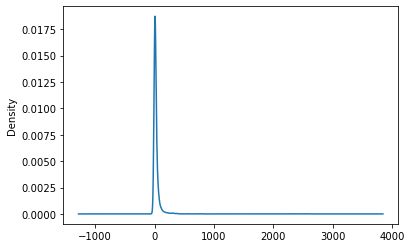

In [10]:
# Visualize the value counts of wstation_usaf
wstation_usaf_counts.plot.density()

In [14]:
#\ Determine which values to replace if counts are less than ...?
#replace_wstation_usaf = list(wstation_usaf_counts[wstation_usaf_counts < 1000].index)

# Replace in dataframe
#for wea in replace_wstation_usaf:
    #if wea <= 49999:
        forest_fire_df.wstation_usaf = forest_fire_df.wstation_usaf.replace(wea,str("5001-49999"))
    #elif wea < 99999:
        forest_fire_df.wstation_usaf = forest_fire_df.wstation_usaf.replace(wea,str("50000-99999"))
    #elif wea < 499999:
        forest_fire_df.wstation_usaf = forest_fire_df.wstation_usaf.replace(wea,str("100000-499999"))
    #elif wea < 999999:
        forest_fire_df.wstation_usaf = forest_fire_df.wstation_usaf.replace(wea,str("500000-999999"))
    #elif wea < 4999999:
        forest_fire_df.wstation_usaf = forest_fire_df.wstation_usaf.replace(wea,str("1M-5M"))
    #else:
        forest_fire_df.wstation_usaf = forest_fire_df.wstation_usaf.replace(wea,str("5M+"))
    
#forest_fire_df.wstation_usaf = forest_fire_df.wstation_usaf.astype(str)

# Check to make sure binning was successful
## forest_fire_df.wstation_usaf.value_counts()

IndentationError: unexpected indent (<ipython-input-14-d35c4275532e>, line 7)

In [7]:
# Look at ASK_AMT value counts for binning
weather_fil_counts = forest_fire_df.weather_file.value_counts()
weather_fil_counts

File Not Found          14235
999999-54828-2006.gz      288
999999-94943-2005.gz      196
999999-94060-2011.gz      196
999999-73801-2012.gz      166
                        ...  
723147-53870-2007.gz        1
725165-99999-2003.gz        1
722420-99999-1992.gz        1
724090-14780-2004.gz        1
726377-99999-1992.gz        1
Name: weather_file, Length: 11314, dtype: int64

<AxesSubplot:ylabel='Density'>

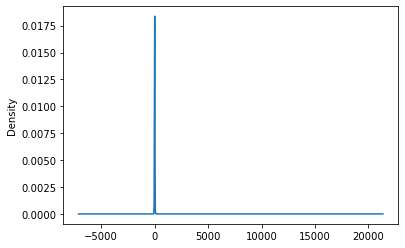

In [8]:
# Visualize the value counts of weather file
weather_fil_counts.plot.density()